# Практика 10

10.1 Записать 2 разных звука

10.2 Определить их спектральные характеристики (спектр, мел-кепстральные коэффициенты, гамматон-частотные кепстральные коэффициенты)

10.3 Построить спектрограмму

10.4 Проанализировать похожесть и отличие записанных звуков

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal

Для данной работы я записал два аккорда на электрогитаре - аккорд "A" и аккорд "D"

**Chord A**

In [2]:
chordA = "A_chord.wav"

samplerateA, dataA = wavfile.read(chordA)
durationA = len(dataA) / samplerateA
timeA = np.arange(0, durationA, 1/samplerateA)

C:\Users\User\AppData\Local\Temp\ipykernel_7716\439544948.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerateA, dataA = wavfile.read(chordA)


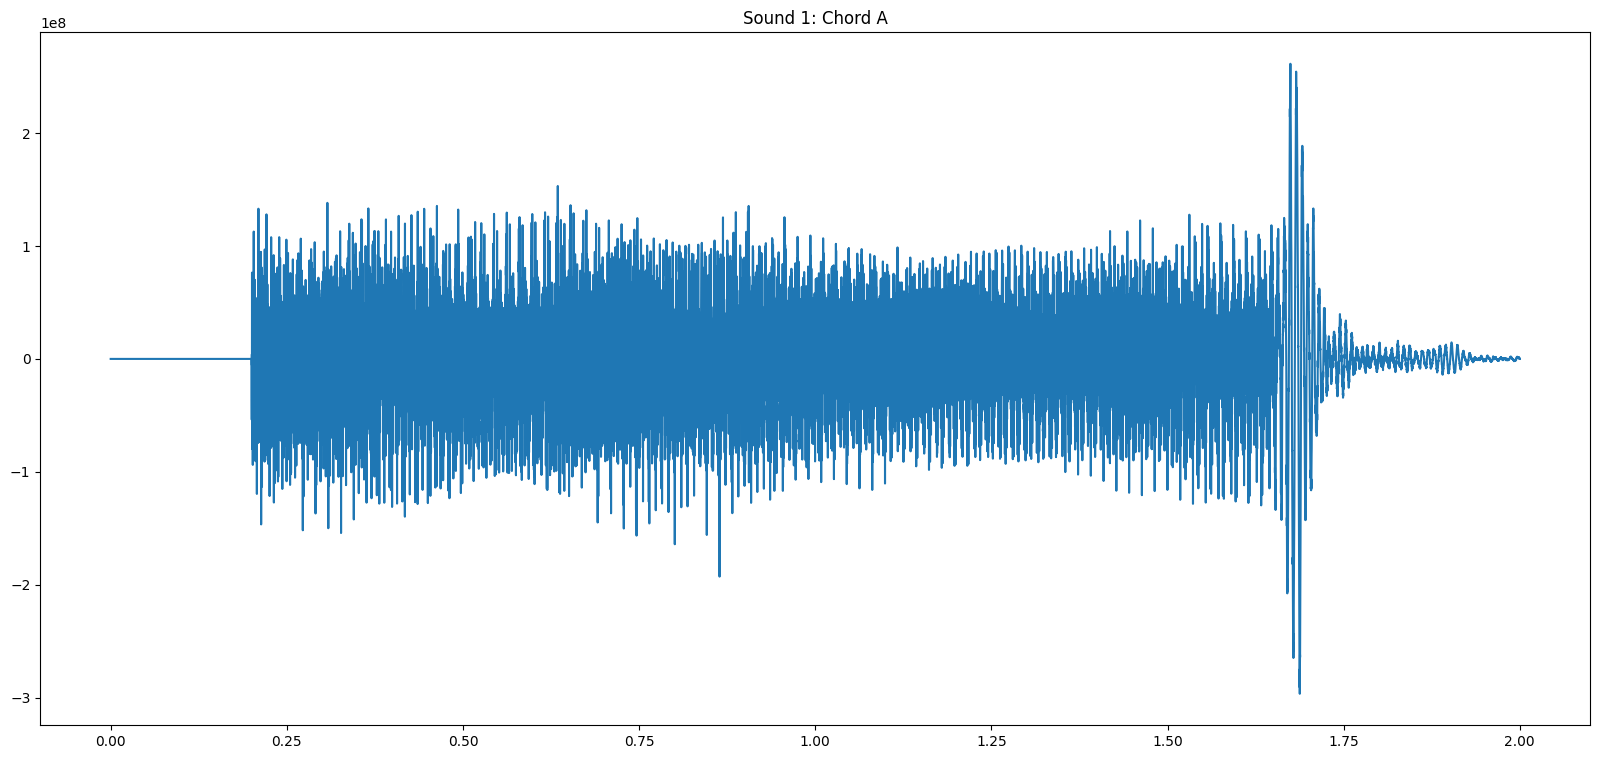

In [3]:
fig = plt.figure(figsize=(20, 9))
plt.plot(timeA, dataA[:, 0])
plt.title("Sound 1: Chord A")
plt.show()

In [4]:
sd.play(dataA[:, 0], samplerateA)
sd.wait()

**Chord D**

In [5]:
chordD = "D_chord.wav"

samplerateD, dataD = wavfile.read(chordD)
durationD = len(dataA) / samplerateD
timeD = np.arange(0, durationD, 1/samplerateD)

C:\Users\User\AppData\Local\Temp\ipykernel_7716\481688959.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerateD, dataD = wavfile.read(chordD)


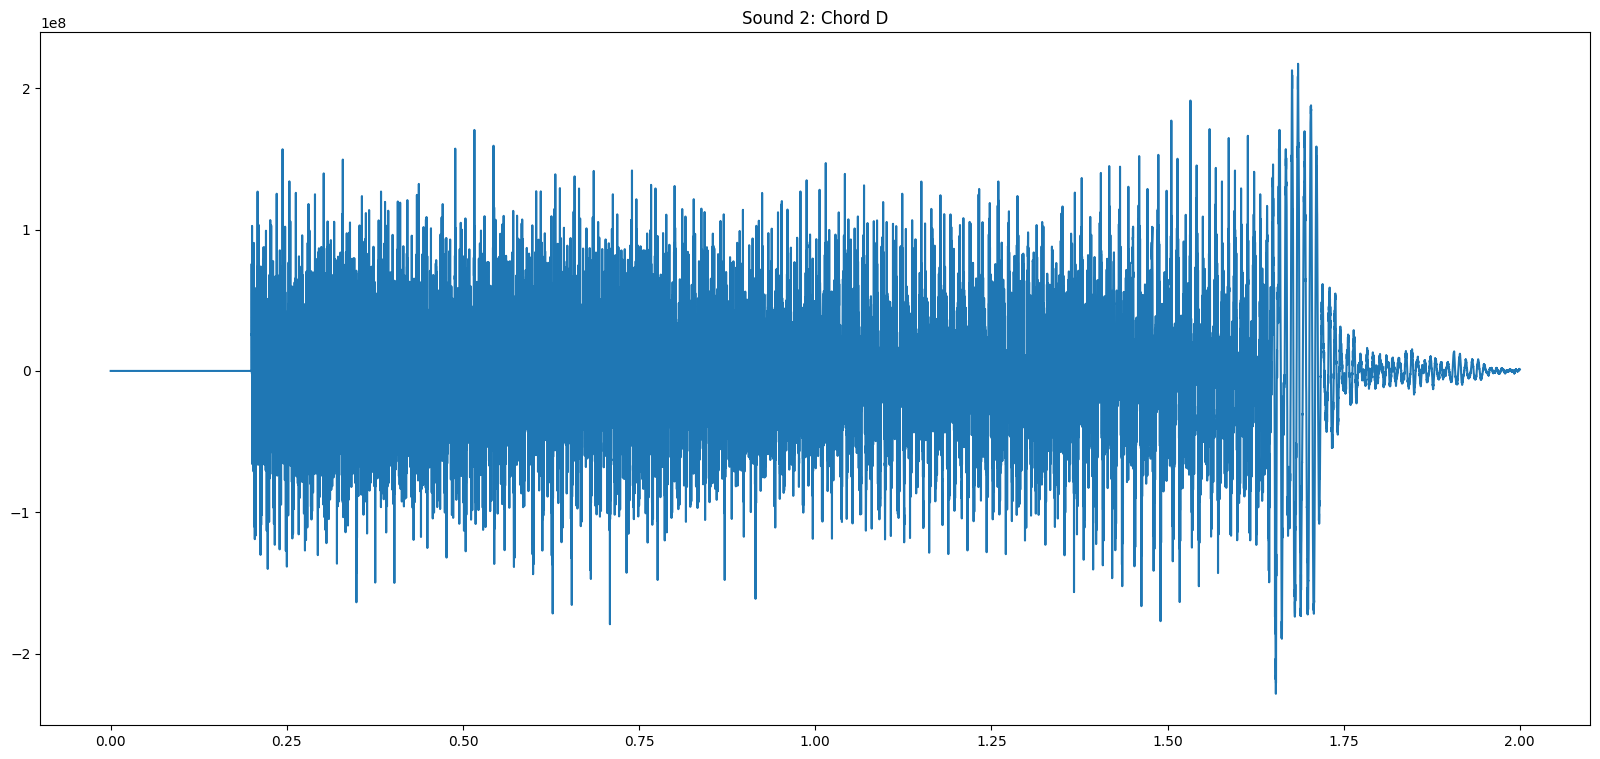

In [6]:
fig = plt.figure(figsize=(20, 9))
plt.plot(timeD, dataD[:, 0])
plt.title("Sound 2: Chord D")
plt.show()

In [7]:
sd.play(dataD[:, 0], samplerateD)
sd.wait()

#### Спектральные характеристики

**Спектр**

In [8]:
from scipy.fft import fft, fftfreq

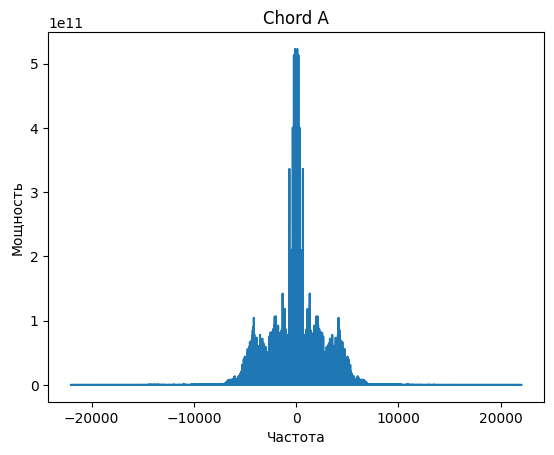

In [9]:
N1 = int(samplerateA * durationA)

yf1 = fft(dataA[:, 0])
xf1 = fftfreq(N1, 1 / samplerateA) 

plt.plot(xf1, np.abs(yf1))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.title("Chord A")
plt.show()

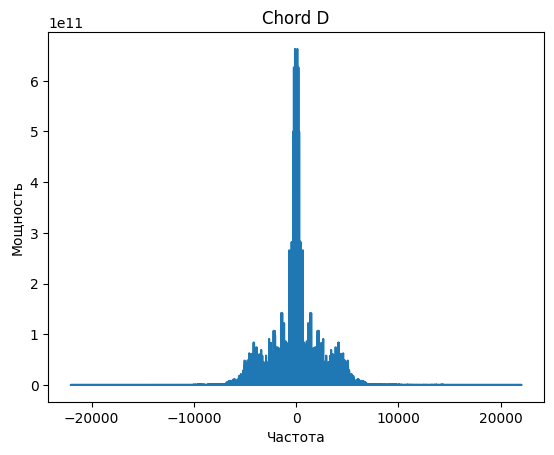

In [10]:
N2 = int(samplerateD * durationD)

yf2 = fft(dataD[:, 0])
xf2 = fftfreq(N2, 1 / samplerateD)

plt.plot(xf2, np.abs(yf2))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.title('Chord D')
plt.show()

**Мел-кепстральные коэффициенты**

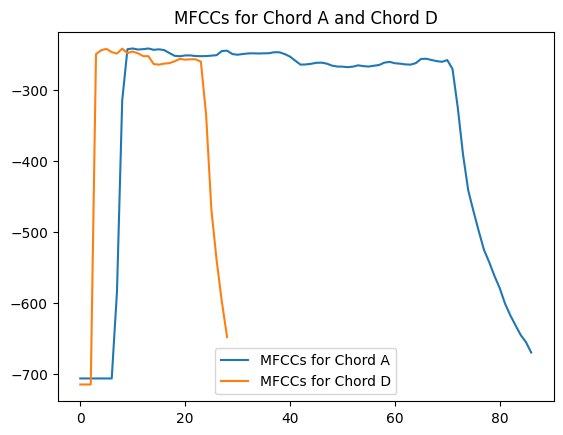

In [11]:
import matplotlib.pyplot as plt
import librosa

# Перезагружаем аудио для Chord A
samples_A, sample_rate_A = librosa.load(chordA)
y_A = samples_A
sr_A = sample_rate_A
mfccs_A = librosa.feature.mfcc(y=y_A, sr=sr_A, n_mfcc=10)
s_A = mfccs_A[0:1,:][0,:]
t_A = [*range(len(s_A))]

# Перезагружаем аудио для Chord D
samples_D, sample_rate_D = librosa.load(chordD)
y_D = samples_D
sr_D = sample_rate_D
mfccs_D = librosa.feature.mfcc(y=y_D, sr=sr_D, n_mfcc=10)
s_D = mfccs_D[0:1,:][0,:][::3]
t_D = [*range(len(s_D))]


plt.plot(t_A, s_A, label='MFCCs for Chord A')
plt.plot(t_D, s_D, label='MFCCs for Chord D')
plt.legend()
plt.title('MFCCs for Chord A and Chord D')
plt.show()


**Гамматон-частотные кепстральные коэффициенты**

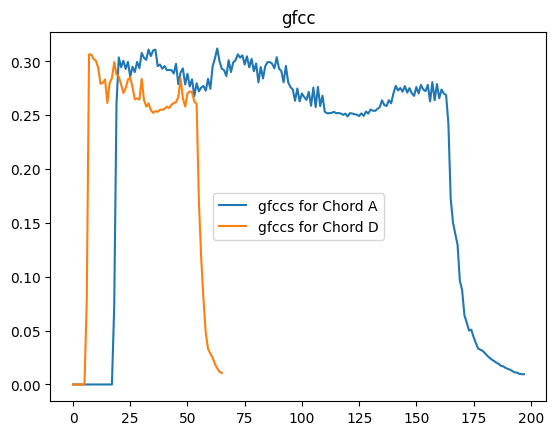

In [12]:
import spafe.features.gfcc as gfcc

#GFFC for chord A
samplesA, sample_rateA = librosa.load(chordA)
yA = samplesA
srA = sample_rateA
gfccsA = gfcc.gfcc(yA, fs=srA, num_ceps=10)

#GFFC for chord D
samplesD, sample_rateD = librosa.load(chordD)
yD = samplesD
srD = sample_rateD
gfccsD= gfcc.gfcc(yD, fs=srD, num_ceps=10)


#Выводим графики
plt.plot(gfccsA[:,0], label='gfccs for Chord A')
plt.title('gfccs for Chord A')

plt.plot(gfccsD[:,0][::3], label='gfccs for Chord D')
plt.title('gfccs for Chord D')

plt.legend()
plt.title('gfcc')
plt.show()


**Спектрограмма**

C:\Users\User\AppData\Local\Temp\ipykernel_7716\3889300895.py:5: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


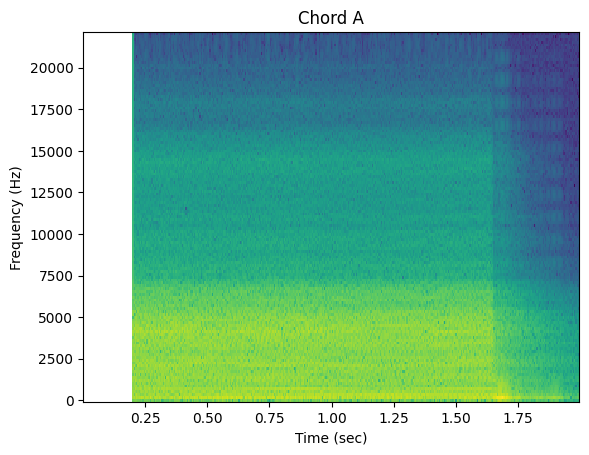

C:\Users\User\AppData\Local\Temp\ipykernel_7716\3889300895.py:17: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


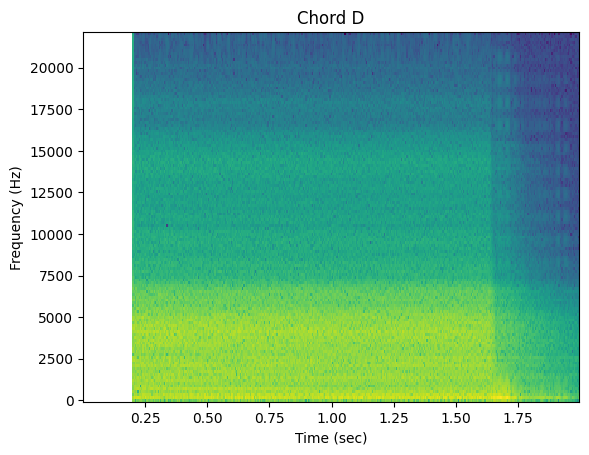

In [13]:
adata = dataA[:, 0]
s = samplerateA

fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.title('Chord A')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()


adata = dataD[:, 0]
s = samplerateD

fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.title('Chord D')
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

**Выводы**

Графики мел-кепстральных коэффициентов, гамматон-частотно кепстральных коэффициентов наглядно демонстрируют различия между двумя сыгрнными аккордами.
Спектограммы, напротив, очень похожи, т. к. сыгранные аккоды имеют схожие гармонические компоненты (схожую аппликатуру на грифе гитары). Также отсутсвие видимых различий на спектрограмме связано с тем, что аккроды сыграны на перегруженной гитаре с эффектом дисторшн, который усиливает сигнал и насыщает его гармониками.